In [2]:


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Task 1

In [4]:
def random_matrix(rows, cols, low=0, high=10):
    return np.random.randint(low, high, size=(rows, cols))

In [35]:

B = random_matrix(2, 3)

In [36]:

B

array([[9, 2, 2],
       [6, 8, 9]])

In [41]:
B = np.array([[2,0], [0, 1], [0, 0]])

In [7]:
def sort_vectors(eigenval, eigenvec):
    sort_index = np.argsort(eigenval, kind= 'mergesort')[::-1]
    return eigenval[sort_index], eigenvec[:,sort_index]

In [8]:
def my_svd(A):
    SL = A @ A.T
    SR = A.T @ A

    SL_val, SL_vec = np.linalg.eigh(SL)
    SR_val, SR_vec = np.linalg.eigh(SR)

    SL_val, U = sort_vectors(SL_val, SL_vec)
    SR_val, V = sort_vectors(SR_val, SR_vec)

    sing_val = np.sqrt(SL_val)

    m, n = A.shape
    r = min(m, n)
    E = np.zeros((m,n))
    E[np.arange(r), np.arange(r)] = sing_val[:r]

    return U, E, V.T

In [42]:
U, E, V_t = my_svd(B)
U @ E @ V_t

array([[2., 0.],
       [0., 1.],
       [0., 0.]])

In [14]:
q = np.array([1, 4, 6, 0, 8])

In [18]:
k = np.argsort(q)
k

array([3, 0, 1, 2, 4])

In [17]:
q[k]

array([0, 1, 4, 6, 8])

### Task2

In [3]:
file_path = 'ml-latest-small/ratings.csv'
df = pd.read_csv(file_path)
df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [30]:
df_p = df.pivot(index= 'userId', columns= 'movieId', values= 'rating')

In [11]:
df_p.isna().sum()

movieId
1         395
2         500
3         558
4         603
5         561
         ... 
193581    609
193583    609
193585    609
193587    609
193609    609
Length: 9724, dtype: int64

In [31]:

df_p.dropna(thresh=150, axis=0, inplace=True)
df_p.dropna(thresh=100, axis=1, inplace=True)

In [32]:
fill_val = 2.5 #df_p.mean().mean().round()
df_p.fillna(fill_val, inplace=True)

In [20]:
df_p

movieId,1,32,47,50,110,150,260,296,318,356,...,4306,4886,4993,5349,5952,6377,6539,6874,7153,8961
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,5.0,5.0,4.0,NaN,5.0,3.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2.0,2.0,NaN,NaN,NaN,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,4.0,1.0,5.0,4.0,NaN,2.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,4.5,NaN,4.5,5.0,NaN,NaN,5.0,...,4.0,4.0,4.5,3.5,4.5,NaN,4.5,NaN,4.0,4.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.5,...,4.5,NaN,4.0,NaN,4.0,3.5,NaN,NaN,4.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
605,4.0,NaN,NaN,NaN,3.0,5.0,5.0,2.0,NaN,3.0,...,3.5,3.0,5.0,NaN,5.0,NaN,5.0,NaN,5.0,NaN
606,2.5,4.0,3.0,4.5,3.5,NaN,4.5,5.0,3.5,4.0,...,4.0,4.0,4.5,4.0,4.5,4.0,3.0,4.5,4.5,4.0
607,4.0,NaN,NaN,NaN,5.0,5.0,3.0,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
r = df_p.values

In [34]:
user_mean = np.mean(r, axis=1) #reshape(-1, 1)

In [35]:
r = r - user_mean.reshape(-1, 1)

In [50]:
def task_2_a(A, k= 0):
    U, E, V_t = np.linalg.svd(A)
    return U[:, :k], E[:k], V_t[:k, :]

In [28]:
user_mean.reshape(-1, 1)

array([[4.5       ],
       [2.83333333],
       [2.83333333],
       [4.25      ],
       [3.25      ],
       [2.5       ],
       [4.25      ],
       [4.08333333],
       [2.75      ],
       [4.66666667],
       [5.        ],
       [2.83333333],
       [3.33333333],
       [4.16666667],
       [4.66666667],
       [4.41666667],
       [3.83333333],
       [4.08333333],
       [4.16666667],
       [2.41666667],
       [3.75      ],
       [3.91666667],
       [2.16666667],
       [4.25      ],
       [4.16666667],
       [2.83333333],
       [3.58333333],
       [2.58333333],
       [3.25      ],
       [5.        ],
       [3.91666667],
       [3.08333333],
       [3.91666667],
       [3.75      ],
       [2.83333333],
       [4.33333333],
       [3.16666667],
       [3.58333333],
       [4.        ],
       [3.66666667],
       [3.75      ],
       [5.        ],
       [3.25      ],
       [4.83333333],
       [4.16666667],
       [3.25      ],
       [3.66666667],
       [4.166

In [36]:
k = 3
U, E, V_t = np.linalg.svd(r)
U = U[:, :k]

In [37]:
V_t = V_t[:k, :]
V_t.T

array([[ 0.14531791, -0.07932109,  0.11752154],
       [-0.25221488, -0.07361961,  0.08503105],
       [ 0.06492729,  0.46530767,  0.03581329],
       [-0.40749974,  0.0492789 , -0.06640842],
       [-0.25668575, -0.00611243, -0.24222216],
       [-0.11121326,  0.01690343, -0.21646686],
       [ 0.23631399, -0.06318547,  0.1087122 ],
       [ 0.14161541,  0.03532418, -0.01332488],
       [-0.15579597, -0.0476346 ,  0.14036332],
       [-0.14050996, -0.00101271,  0.45259749],
       [ 0.34735842, -0.27328199, -0.00341495],
       [-0.24590542, -0.01506576,  0.26847301],
       [ 0.07010114,  0.44972726, -0.03528511],
       [ 0.12619774,  0.27406393,  0.16719746],
       [ 0.12286872,  0.34526936, -0.10968767],
       [ 0.03176277, -0.04934494,  0.23304575],
       [ 0.15824588,  0.17890309,  0.03911753],
       [ 0.30149514, -0.14463362,  0.020794  ],
       [ 0.00233033, -0.04367056,  0.01018159],
       [-0.07128462,  0.09041222, -0.36799712],
       [ 0.06576508, -0.2283483 ,  0.141

In [13]:
U

array([[-0.10423191, -0.0486775 ,  0.11701519],
       [-0.25393107, -0.08575014, -0.11847179],
       [ 0.06167357, -0.2114704 , -0.04659884],
       [ 0.01493453, -0.03431137,  0.03369839],
       [-0.09295234,  0.06023676,  0.11315672],
       [ 0.        ,  0.        ,  0.        ],
       [-0.04769789, -0.06557723,  0.00176799],
       [ 0.01808238,  0.03028765, -0.0223581 ],
       [ 0.0629276 ,  0.18267287, -0.14094734],
       [ 0.06325497, -0.00939526,  0.02632272],
       [ 0.        ,  0.        ,  0.        ],
       [ 0.07019834,  0.0546264 , -0.0808657 ],
       [-0.16508456,  0.0201186 , -0.05670146],
       [-0.04750486, -0.04722163,  0.12109341],
       [ 0.02748431, -0.03123462,  0.02915682],
       [-0.06990315,  0.09678061, -0.09201204],
       [ 0.06364908,  0.02934068, -0.01555938],
       [ 0.16784247, -0.00076514,  0.01879314],
       [-0.16788099, -0.07801818,  0.13257457],
       [ 0.01720317, -0.0016749 ,  0.00475961],
       [-0.02109279, -0.12877441,  0.058

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-v0_8")


def plot_data(mat, data_type, camera=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    if camera is not None:
        ax.view_init(elev=camera[0], azim=camera[1])

    for i in range(mat.shape[0]):
        x, y, z = mat[i]
        ax.scatter(x, y, z, alpha=0.8)
        ax.text(x, y, z, f'{data_type} {i}', size=10)

    plt.show()


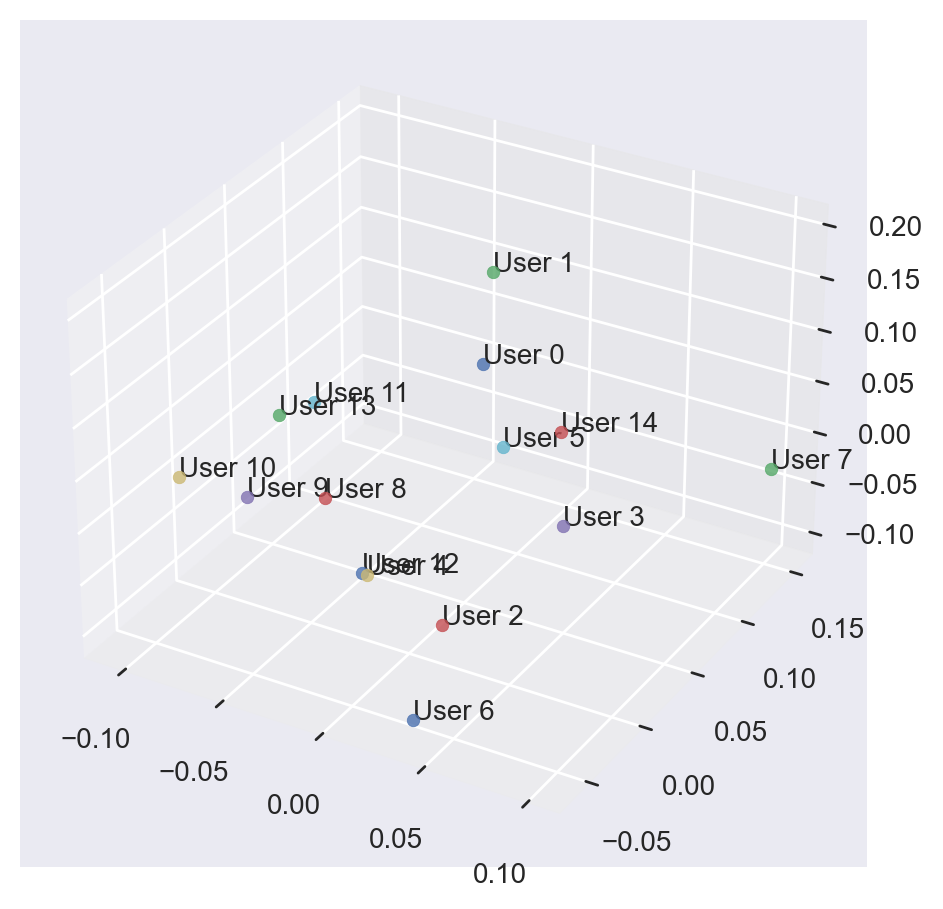

In [38]:
plot_data(U[:15,:], "User")

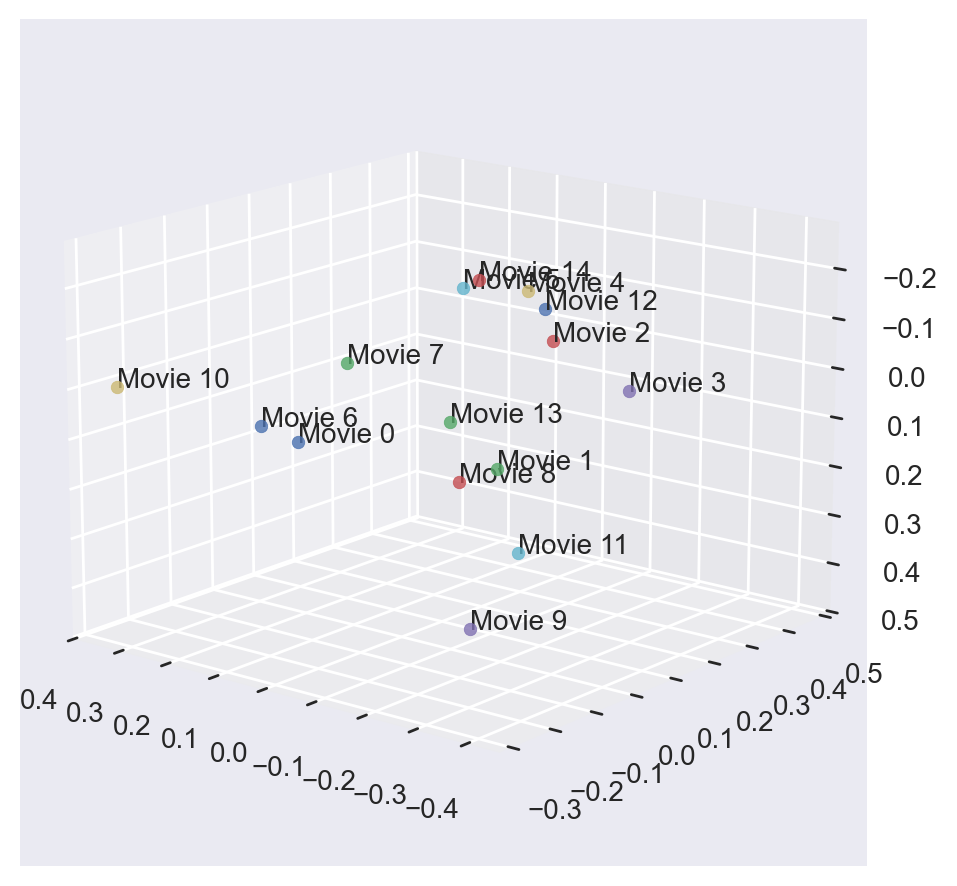

In [42]:
plot_data(V_t.T[:15,:], "Movie", [-164.5, 51.25])

In [61]:
V_t.T

array([[ 0.40256754,  0.45671826, -0.03288917],
       [ 0.40443881, -0.48186343, -0.63358592],
       [ 0.41491919, -0.41956895,  0.76246765],
       [ 0.40006187,  0.419193  , -0.04303778],
       [ 0.42014948,  0.33760007,  0.03886419],
       [ 0.40698355, -0.30574723, -0.11299377]])

### Task 3

In [10]:
df_2 = df.pivot(index= 'userId', columns= 'movieId', values= 'rating')

In [11]:
# df_2.dropna(thresh=20, axis=0, inplace=True)
df_2.dropna(thresh=30, axis=1, inplace=True)
df_2.dropna(thresh=20, axis=0, inplace=True)

In [60]:
# mean_u = df_2.mean(axis=1)
# df_2 = df_2 - mean_u

In [61]:
# df_2.fillna(0, inplace=True)

In [12]:
df_2

movieId,1,2,3,5,6,7,10,11,16,17,...,115617,116797,119145,122882,122886,122904,134130,134853,139385,152081
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,4.0,5.0,5.0,4.0,4.0,3.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_2.mean()

movieId
1         3.935714
2         3.431818
3         3.280000
5         3.052083
6         3.946078
            ...   
122904    3.849057
134130    4.000000
134853    3.785714
139385    3.883333
152081    3.887097
Length: 882, dtype: float64

In [112]:
df_2.median()

movieId
1         4.0
2         3.5
3         3.0
5         3.0
6         4.0
         ... 
122904    4.0
134130    4.0
134853    4.0
139385    4.0
152081    4.0
Length: 882, dtype: float64

In [15]:
def prediction(df, nan = None, k = 0.9):
    nan = df.mean() if nan is None else nan
    df = df.fillna(nan)#df.fillna(fill_val, inplace=True)
    C = df.values
    user_mean = np.mean(C, axis=1)  #reshape(-1, 1)
    C = C - user_mean.reshape(-1, 1)
    if k <= 1:
        U, s, V_t = np.linalg.svd(C)
        cum = np.cumsum(s**2) / np.sum(s**2)
        m = np.argmax(cum >= k) + 1
        U = U[:, :m]
        s = s[:m]
        V_t = V_t[:m, :]
    else:
        U, s, V_t = task_2_a(C, k)
    E = np.zeros((U.shape[1], V_t.shape[0]))
    r = s.shape[0]
    E[np.arange(r), np.arange(r)] = s[:r]
    K = (U @ E @ V_t) + user_mean.reshape(-1, 1)
    return pd.DataFrame(K, columns=df.columns, index=df.index)


In [18]:
pred = prediction(df_2)

In [21]:
pred = pred[df_2.isna()]

In [31]:
user_id = 7
row = pred.loc[user_id]     # this is a Series
recom = row.nlargest(10).to_frame(name='rate_expected')

In [38]:
movie = pd.read_csv('ml-latest-small/movies.csv', index_col="movieId")

In [52]:
recom.merge(movie, on="movieId", how='left').drop("rate_expected", axis= 1)

,title,genres
movieId,,
2028,Saving Private Ryan (1998),Action|Drama|War
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
1136,Monty Python and the Holy Grail (1975),Adventure|Comedy|Fantasy
1272,Patton (1970),Drama|War
318,"Shawshank Redemption, The (1994)",Crime|Drama
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1276,Cool Hand Luke (1967),Drama
608,Fargo (1996),Comedy|Crime|Drama|Thriller
1204,Lawrence of Arabia (1962),Adventure|Drama|War


In [56]:
def recomendation(user_id):
    pred = prediction(df_2)
    pred = pred[df_2.isna()]
    user_id = user_id
    row = pred.loc[user_id]
    recom = row.nlargest(10).to_frame(name='rate_expected')
    return recom.merge(movie, on="movieId", how='left').drop("rate_expected", axis= 1)

In [58]:
recomendation(10)

,title,genres
movieId,,
4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance
858,"Godfather, The (1972)",Crime|Drama
318,"Shawshank Redemption, The (1994)",Crime|Drama
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance
1208,Apocalypse Now (1979),Action|Drama|War
1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi
364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX
